TASK 1: Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
#Loading the data set

df = pd.read_csv('tested.csv')
#The dataset used for reference is from www.kaggle.com

In [3]:
#Top view of a dataset

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Bottom View of dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
#In-depth discription of given dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#Checking if any important column has a Null Value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Filling the empty spaces within the column

df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Age'].fillna(df['Age'].mean())

In [8]:
#Changing the data type of required columns

df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

In [9]:
# In the dataset the values under column 'Sex' are either male or 
# female 'string' for making our job easier considering 'female' as '1' and 'male' as '0' 'int'

df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [10]:
#Dropping few un-required columns

data = df.drop(['PassengerId','Name','Cabin','Ticket'], axis=1 ,inplace=True)

In [11]:
# 'Embarked ' column contains 3 unique character Q,S,C mapping
# 0,1,2 as there values respectively and converting datatype to int

df['Embarked'] = df['Embarked'].map( {'Q': 0,'S':1,'C':2}).astype(int)

In [12]:
#Splitting the dataset into training set and a test set

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2)

In [13]:
# Building a LogisticRegression Model 

model = LogisticRegression(solver='liblinear',max_iter=200)

In [14]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [15]:
#Evaluating Model on test set

accuracy = accuracy_score(y_test, model.predict(X_test))
print('Logistic Regression Accuracy',accuracy*100)


Logistic Regression Accuracy 100.0


In [16]:
#Making Predictions on required data


predictions = model.predict(X_test)
print('Predictions',predictions)

Predictions [0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 1 0]


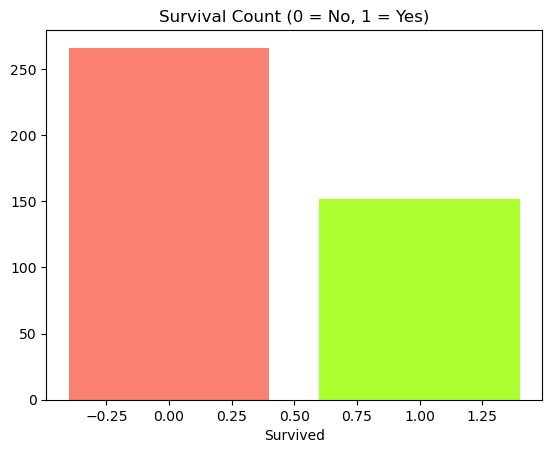

In [22]:
#Graphical represntation of column "Survived"

import matplotlib.pyplot as plt

survival_counts = df['Survived'].value_counts()

plt.bar(survival_counts.index, survival_counts.values, color=['salmon', 'greenyellow'])


plt.xlabel('Survived')


plt.title('Survival Count (0 = No, 1 = Yes)')




plt.show()
